# Introduction

<center><img src="https://i.imgur.com/9hLRsjZ.jpg" height=400></center>

This dataset was scraped from [nextspaceflight.com](https://nextspaceflight.com/launches/past/?page=1) and includes all the space missions since the beginning of Space Race between the USA and the Soviet Union in 1957!

### Install Package with Country Codes

In [1]:
%pip install iso3166

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\ddwil\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip' command.


### Upgrade Plotly

Run the cell below if you are working with Google Colab.

In [2]:
%pip install --upgrade plotly

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\ddwil\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip' command.


### Import Statements

In [3]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# These might be helpful:
from iso3166 import countries
from datetime import datetime, timedelta

### Notebook Presentation

In [4]:
pd.options.display.float_format = '{:,.2f}'.format

### Load the Data

In [5]:
df_data = pd.read_csv('mission_launches.csv')

# Preliminary Data Exploration

* What is the shape of `df_data`? 
* How many rows and columns does it have?
* What are the column names?
* Are there any NaN values or duplicates?

In [6]:
df_data.shape

df_data.columns

df_data.duplicated



<bound method DataFrame.duplicated of       Unnamed: 0.1  Unnamed: 0 Organisation  \
0                0           0       SpaceX   
1                1           1         CASC   
2                2           2       SpaceX   
3                3           3    Roscosmos   
4                4           4          ULA   
...            ...         ...          ...   
4319          4319        4319      US Navy   
4320          4320        4320         AMBA   
4321          4321        4321      US Navy   
4322          4322        4322    RVSN USSR   
4323          4323        4323    RVSN USSR   

                                               Location  \
0            LC-39A, Kennedy Space Center, Florida, USA   
1     Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...   
2                         Pad A, Boca Chica, Texas, USA   
3          Site 200/39, Baikonur Cosmodrome, Kazakhstan   
4              SLC-41, Cape Canaveral AFS, Florida, USA   
...                                        

In [7]:

clean_data = df_data.drop_duplicates()
clean_data = clean_data.dropna()


## Data Cleaning - Check for Missing Values and Duplicates

Consider removing columns containing junk data. 

In [8]:
clean_data = clean_data.drop(columns=['Unnamed: 0.1'])
clean_data = clean_data.drop(columns=['Unnamed: 0'])

In [9]:
clean_data





,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success
5,CASC,"LC-9, Taiyuan Satellite Launch Center, China","Sat Jul 25, 2020 03:13 UTC","Long March 4B | Ziyuan-3 03, Apocalypse-10 & N...",StatusActive,64.68,Success
...,...,...,...,...,...,...,...
3855,US Air Force,"SLC-4W, Vandenberg AFB, California, USA","Fri Jul 29, 1966 18:43 UTC",Titan IIIB | KH-8,StatusRetired,59.0,Success
3971,US Air Force,"SLC-20, Cape Canaveral AFS, Florida, USA","Thu May 06, 1965 15:00 UTC",Titan IIIA | LES 2 & LCS 1,StatusRetired,63.23,Success
3993,US Air Force,"SLC-20, Cape Canaveral AFS, Florida, USA","Thu Feb 11, 1965 15:19 UTC",Titan IIIA | LES 1,StatusRetired,63.23,Success
4000,US Air Force,"SLC-20, Cape Canaveral AFS, Florida, USA","Thu Dec 10, 1964 16:52 UTC",Titan IIIA | Transtage 2,StatusRetired,63.23,Success


## Descriptive Statistics

In [10]:
clean_data.describe()



,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
count,964,964,964,964,964,964,964
unique,25,56,963,962,2,56,4
top,CASC,"LC-39A, Kennedy Space Center, Florida, USA","Wed Nov 05, 2008 00:15 UTC",Long March 2D | Shiyan-3 & Chuangxin-1(02),StatusActive,450.0,Success
freq,158,120,2,2,586,136,910


# Number of Launches per Company

Create a chart that shows the number of space mission launches by organisation.

<BarContainer object of 25 artists>

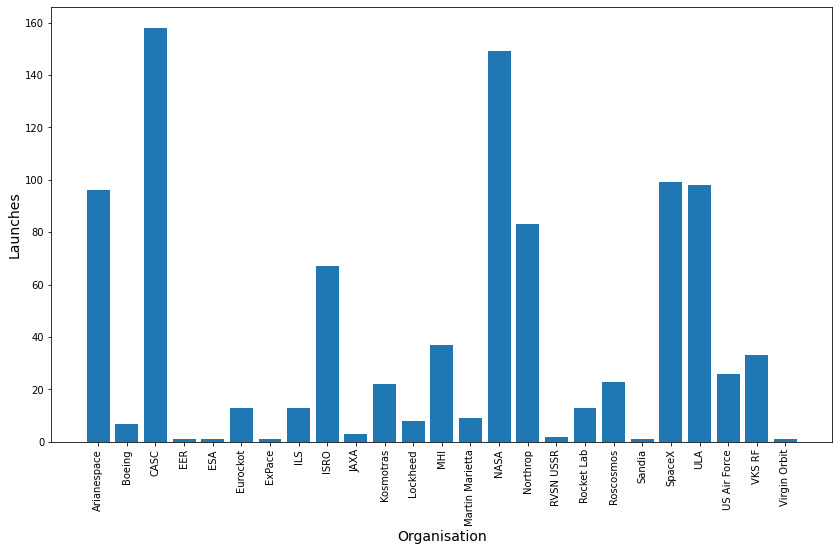

In [11]:

launchesPerOrg = clean_data.groupby(['Organisation']).count()


plt.figure(figsize=(14,8))
plt.xticks(rotation = 90)
plt.xlabel('Organisation', fontsize=14)
plt.ylabel('Launches', fontsize=14)
plt.bar(launchesPerOrg.index, launchesPerOrg.Date)




# Number of Active versus Retired Rockets

How many rockets are active compared to those that are decomissioned? 

In [12]:
active = clean_data.query('Rocket_Status == "StatusActive"').value_counts().count()
retired = clean_data.query('Rocket_Status == "StatusRetired"').value_counts().count()

print(f'There are {active} active rockets and {retired} retired rockets')



There are 585 active rockets and 378 retired rockets


# Distribution of Mission Status

How many missions were successful?
How many missions failed?

In [13]:
failed = clean_data.query('Mission_Status == "Failure"').value_counts().count()
success = clean_data.query('Mission_Status == "Success"').value_counts().count()

print(f'There are {success} successful missions and {failed} failed missions')


There are 909 successful missions and 36 failed missions


# How Expensive are the Launches? 

Create a histogram and visualise the distribution. The price column is given in USD millions (careful of missing values). 

# Use a Choropleth Map to Show the Number of Launches by Country

* Create a choropleth map using [the plotly documentation](https://plotly.com/python/choropleth-maps/)
* Experiment with [plotly's available colours](https://plotly.com/python/builtin-colorscales/). I quite like the sequential colour `matter` on this map. 
* You'll need to extract a `country` feature as well as change the country names that no longer exist.

Wrangle the Country Names

You'll need to use a 3 letter country code for each country. You might have to change some country names.

* Russia is the Russian Federation
* New Mexico should be USA
* Yellow Sea refers to China
* Shahrud Missile Test Site should be Iran
* Pacific Missile Range Facility should be USA
* Barents Sea should be Russian Federation
* Gran Canaria should be USA


You can use the iso3166 package to convert the country names to Alpha3 format.

# Use a Choropleth Map to Show the Number of Failures by Country


# Create a Plotly Sunburst Chart of the countries, organisations, and mission status. 

# Analyse the Total Amount of Money Spent by Organisation on Space Missions

# Analyse the Amount of Money Spent by Organisation per Launch

# Chart the Number of Launches per Year

# Chart the Number of Launches Month-on-Month until the Present

Which month has seen the highest number of launches in all time? Superimpose a rolling average on the month on month time series chart. 

# Launches per Month: Which months are most popular and least popular for launches?

Some months have better weather than others. Which time of year seems to be best for space missions?

# How has the Launch Price varied Over Time? 

Create a line chart that shows the average price of rocket launches over time. 

# Chart the Number of Launches over Time by the Top 10 Organisations. 

How has the dominance of launches changed over time between the different players? 

# Cold War Space Race: USA vs USSR

The cold war lasted from the start of the dataset up until 1991. 

## Create a Plotly Pie Chart comparing the total number of launches of the USSR and the USA

Hint: Remember to include former Soviet Republics like Kazakhstan when analysing the total number of launches. 

## Create a Chart that Shows the Total Number of Launches Year-On-Year by the Two Superpowers

## Chart the Total Number of Mission Failures Year on Year.

## Chart the Percentage of Failures over Time

Did failures go up or down over time? Did the countries get better at minimising risk and improving their chances of success over time? 

# For Every Year Show which Country was in the Lead in terms of Total Number of Launches up to and including including 2020)

Do the results change if we only look at the number of successful launches? 

# Create a Year-on-Year Chart Showing the Organisation Doing the Most Number of Launches

Which organisation was dominant in the 1970s and 1980s? Which organisation was dominant in 2018, 2019 and 2020? 